<a href="https://colab.research.google.com/github/ParasRupani/COB-DataScience/blob/main/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset - netflix1.csv')

In [3]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [4]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
categorical_columns = df.select_dtypes(include=[object]).columns

In [7]:
#Applying lebel encoding to categorical columns
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [8]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,0,0,1972,2294,80,1656,2020,4,210,273
1,2222,1,2644,2104,20,1651,2021,8,0,241
2,5551,1,4558,2865,80,1651,2021,8,0,498
3,445,0,1657,627,6,1642,2021,9,211,124
4,7761,0,6043,1503,80,1651,1993,8,32,318


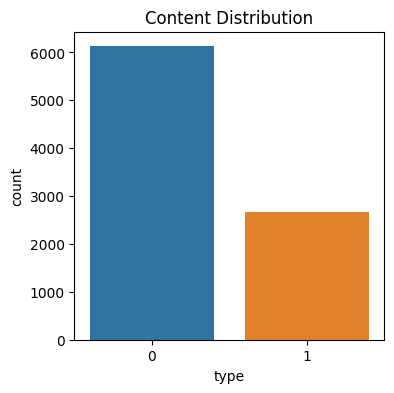

In [9]:
# Distribution of Content Types
plt.figure(figsize=(4, 4))
sns.countplot(x='type', data=df)
plt.title('Content Distribution')
plt.show()

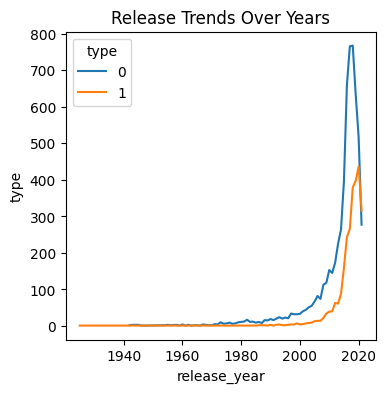

In [10]:
# Release Trends Over Years
plt.figure(figsize=(4, 4))
sns.lineplot(x='release_year', y='type', data=df, estimator='count', errorbar=None, hue='type')
plt.title('Release Trends Over Years')
plt.show()

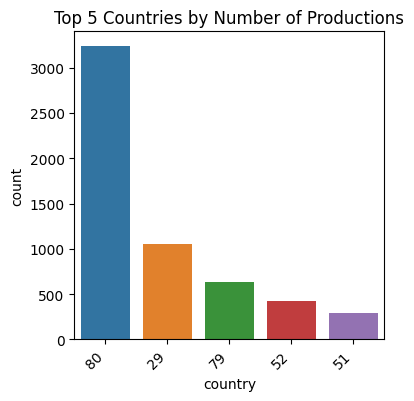

In [11]:
# Geographical Distribution
plt.figure(figsize=(4, 4))
sns.countplot(x='country', data=df, order=df['country'].value_counts().index[:5])
plt.title('Top 5 Countries by Number of Productions')
plt.xticks(rotation=45, ha='right')
plt.show()

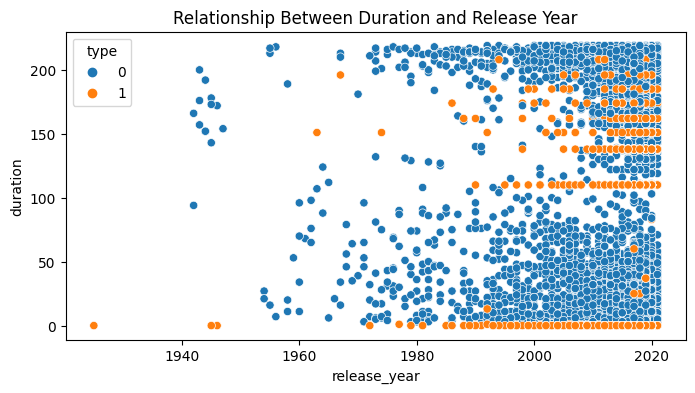

In [12]:
# Relationship Between Duration and Release Year
plt.figure(figsize=(8, 4))
sns.scatterplot(x='release_year', y='duration', hue='type', data=df)
plt.title('Relationship Between Duration and Release Year')
plt.show()

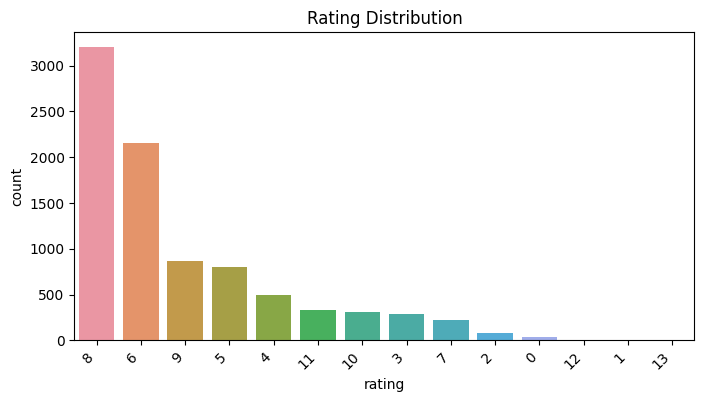

In [13]:
# Rating Distribution
plt.figure(figsize=(8, 4))
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index)
plt.title('Rating Distribution')
plt.xticks(rotation=45, ha='right')
plt.show()

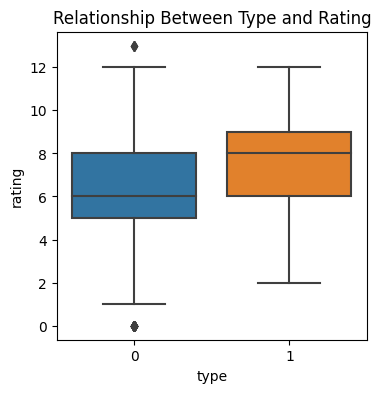

In [14]:
# Relationship Between Type and Rating
plt.figure(figsize=(4, 4))
sns.boxplot(x='type', y='rating', data=df, order=df['type'].unique())
plt.title('Relationship Between Type and Rating')
plt.show()

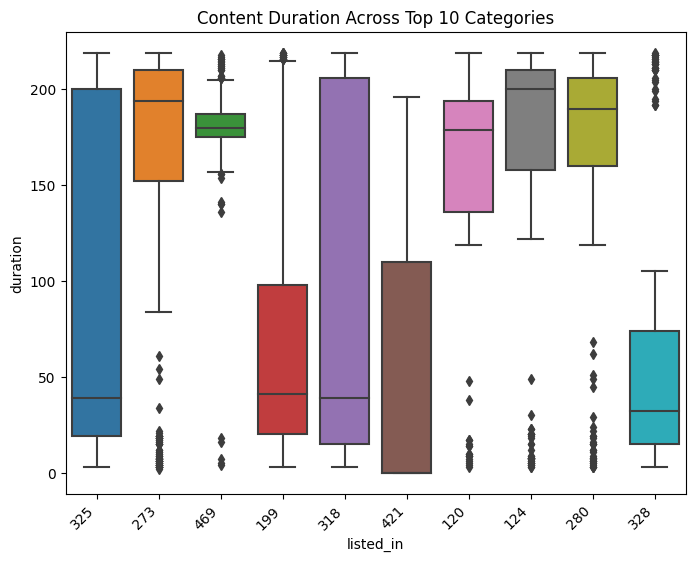

In [15]:
# Content Duration Across Categories
plt.figure(figsize=(8, 6))
sns.boxplot(x='listed_in', y='duration', data=df, order=df['listed_in'].value_counts().index[:10])
plt.title('Content Duration Across Top 10 Categories')
plt.xticks(rotation=45, ha='right')
plt.show()